In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from matplotlib.patches import Rectangle
import matplotlib.animation as animation
from IPython.display import HTML
from IPython.display import Image

import os
if "NOTEBOOK_DIR" not in globals():
    NOTEBOOK_DIR = os.getcwd()
    print('Notebook Directory Set:', os.getcwd())

os.chdir(os.path.join(NOTEBOOK_DIR, ".."))
print("Current working directory:", os.getcwd())

Current working directory: /shared_folder/eas_508_project


In [36]:
df = pd.read_csv('data/evals/down3.0_preds.csv')

In [37]:
df = df[df['down'] == 4]

In [38]:
df

,nflverse_game_id,play_id,down,defenders_in_box,RB,TE,WR,OL,DL,LB,...,WR3,TE1,TE2,pass_yards_season,rush_yards_season,offense_formation_PISTOL,offense_formation_SHOTGUN,offense_formation_UNDER_CENTER,pred,prob
22,2022_01_BAL_NYJ,3419,4.0,8.0,1,1,3,5,2,4,...,0.949286,0.203776,-0.615677,-0.424493,-0.669504,0.0,0.0,1.0,1,0.668577
24,2022_01_BAL_NYJ,3551,4.0,5.0,1,1,3,5,2,3,...,0.920166,0.203776,-0.615677,-0.424493,-0.669504,0.0,1.0,0.0,1,0.517866
26,2022_01_BAL_NYJ,3647,4.0,5.0,1,1,3,5,2,3,...,0.949286,0.203776,-0.615677,-0.424493,-0.669504,0.0,1.0,0.0,0,0.363242
29,2022_01_BAL_NYJ,4047,4.0,4.0,1,1,3,5,2,3,...,0.949286,0.203776,-0.615677,-0.424493,-0.669504,0.0,1.0,0.0,0,0.212228
40,2022_01_BUF_LA,1358,4.0,7.0,1,1,3,5,4,2,...,0.541613,0.506022,-0.615677,2.669861,0.173777,0.0,1.0,0.0,1,0.641459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16205,2023_21_KC_BAL,535,4.0,8.0,2,2,0,6,6,2,...,-1.263793,-0.158920,1.555704,-1.184484,2.309102,0.0,1.0,0.0,1,0.713162
16213,2023_21_KC_BAL,1347,4.0,10.0,1,2,2,5,3,4,...,-1.263793,1.473211,1.654403,2.462330,0.918428,0.0,0.0,1.0,1,0.650424
16227,2023_21_KC_BAL,3511,4.0,6.0,1,1,3,5,4,1,...,1.036644,-0.158920,-0.615677,-1.184484,2.309102,0.0,1.0,0.0,1,0.515203
16253,2023_22_SF_KC,3156,4.0,6.0,1,1,3,5,4,2,...,0.891047,1.291863,-0.615677,0.624610,1.963899,0.0,1.0,0.0,1,0.552623


In [40]:
df.columns

Index(['nflverse_game_id', 'play_id', 'down', 'defenders_in_box', 'RB', 'TE',
       'WR', 'OL', 'DL', 'LB', 'DB', 'home', 'qtr',
       'quarter_seconds_remaining', 'pass_run_ratio', 'success',
       'ydstosuccess', 'yardline_100', 'score_differential', 'spread',
       'total_line', 'QB1', 'QB2', 'RB1', 'RB2', 'WR1', 'WR2', 'WR3', 'TE1',
       'TE2', 'pass_yards_season', 'rush_yards_season',
       'offense_formation_PISTOL', 'offense_formation_SHOTGUN',
       'offense_formation_UNDER_CENTER', 'pred', 'prob'],
      dtype='object')

<Axes: xlabel='defenders_in_box', ylabel='prob'>

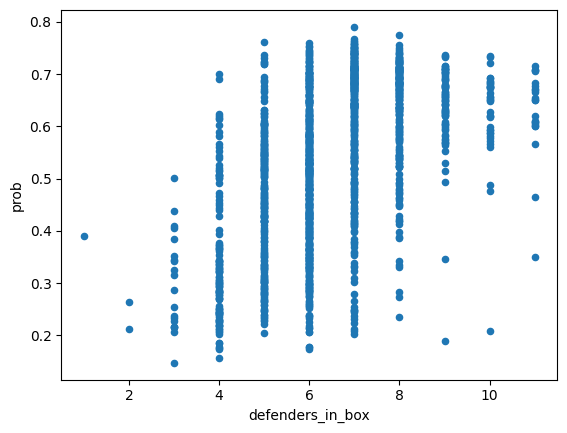

In [41]:
df.plot('defenders_in_box','prob', kind='scatter')

<Axes: xlabel='ydstosuccess', ylabel='prob'>

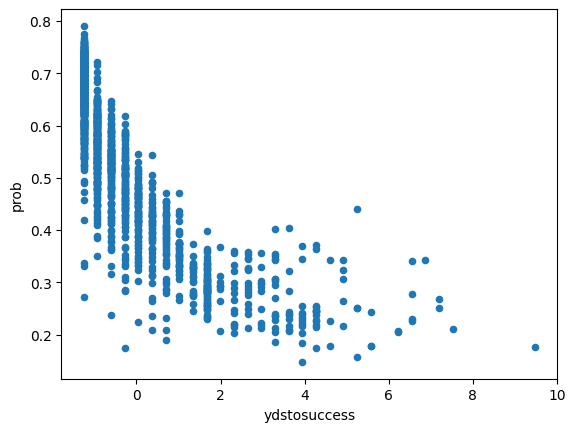

In [42]:
df.plot('ydstosuccess','prob', kind='scatter')

<Axes: xlabel='rush_yards_season', ylabel='prob'>

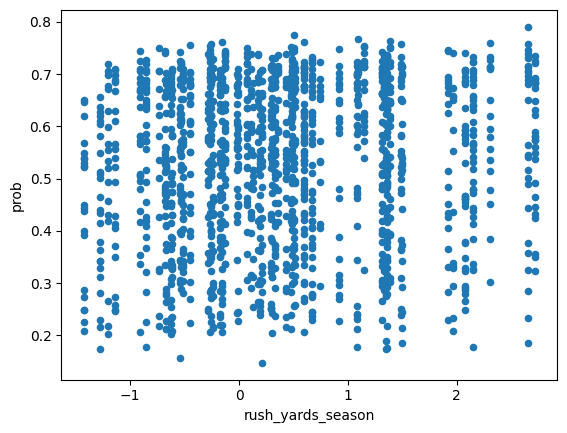

In [43]:
df.plot('rush_yards_season','prob', kind='scatter')

In [44]:
df['pred'].mean()

np.float64(0.6197183098591549)

In [45]:
df['prob'].mean()

np.float64(0.530685609603073)

In [53]:
df[(df['success'] == 1) & (df['prob'] > .45) & (df['prob'] < .5)]['offense_formation_SHOTGUN'].mean()

np.float64(0.967741935483871)

In [ ]:
df[(df['success'] == 1) & (df['prob'] > .45) & (df['prob'] < .5)]['QB1'].mean()

np.float64(-0.5888810462696226)

In [64]:
for i in np.arange(.4, .6, .005):
    df[f'{i}_prob'] = (df['prob'] > i).astype(int)
    df[f'{i}_succ'] = (df[f'{i}_prob'] == df['success']).astype(int)

In [65]:
df

,nflverse_game_id,play_id,down,defenders_in_box,RB,TE,WR,OL,DL,LB,...,0.5500000000000002_succ,0.5550000000000002_succ,0.5600000000000002_succ,0.5650000000000002_succ,0.5700000000000002_succ,0.5750000000000002_succ,0.5800000000000002_succ,0.5850000000000002_succ,0.5900000000000002_succ,0.5950000000000002_succ
22,2022_01_BAL_NYJ,3419,4.0,8.0,1,1,3,5,2,4,...,1,1,1,1,1,1,1,1,1,1
24,2022_01_BAL_NYJ,3551,4.0,5.0,1,1,3,5,2,3,...,0,0,0,0,0,0,0,0,0,0
26,2022_01_BAL_NYJ,3647,4.0,5.0,1,1,3,5,2,3,...,1,1,1,1,1,1,1,1,1,1
29,2022_01_BAL_NYJ,4047,4.0,4.0,1,1,3,5,2,3,...,0,0,0,0,0,0,0,0,0,0
40,2022_01_BUF_LA,1358,4.0,7.0,1,1,3,5,4,2,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16205,2023_21_KC_BAL,535,4.0,8.0,2,2,0,6,6,2,...,1,1,1,1,1,1,1,1,1,1
16213,2023_21_KC_BAL,1347,4.0,10.0,1,2,2,5,3,4,...,0,0,0,0,0,0,0,0,0,0
16227,2023_21_KC_BAL,3511,4.0,6.0,1,1,3,5,4,1,...,0,0,0,0,0,0,0,0,0,0
16253,2023_22_SF_KC,3156,4.0,6.0,1,1,3,5,4,2,...,1,0,0,0,0,0,0,0,0,0


In [69]:
mean_df = df.drop(columns=['nflverse_game_id','play_id'])

In [73]:
print(mean_df.mean().to_dict())

{'down': 4.0, 'defenders_in_box': 6.463508322663253, 'RB': 1.058258642765685, 'TE': 1.2848911651728554, 'WR': 2.556978233034571, 'OL': 5.069782330345711, 'DL': 3.1702944942381563, 'LB': 2.88348271446863, 'DB': 4.925096030729834, 'home': 0.47439180537772085, 'qtr': 3.0492957746478875, 'quarter_seconds_remaining': 354.93341869398205, 'pass_run_ratio': 1.6200963377158297, 'success': 0.5128040973111395, 'ydstosuccess': -0.25272015789513885, 'yardline_100': -0.5702859604141941, 'score_differential': -0.4116947440744509, 'spread': -0.0037717157355531676, 'total_line': -0.3533517394356805, 'QB1': -0.40069943931312507, 'QB2': -0.0274963646546837, 'RB1': -0.1600784480743886, 'RB2': -0.11573602965653455, 'WR1': -0.23066622545641666, 'WR2': -0.13423962745872717, 'WR3': 0.1661175481821086, 'TE1': -0.06008034481944404, 'TE2': -0.0669760589816902, 'pass_yards_season': -0.046361708387575015, 'rush_yards_season': 0.40078848491695673, 'offense_formation_PISTOL': 0.016005121638924456, 'offense_formation